# Project 4
The data for this project is real data provided to us by the HPI School of Design Thinking. You are given as input a table stored in CSV format in a file named ‘project4.csv’. This table has 321 rows and five columns. Each row corresponds
to a student and the columns are as follows:

< hash > < Sex > < Discipline > < Nationality > < Semester >

- The < hash > field contains a cryptographic hash of the student’s name (for privacy reasons).
- The sex field contains ‘m’ for male and ‘f’ for female.
- The Discipline field contains one of the following seven entries:
    ‘Business’, ‘Creative Disciplines’, ‘Engineering’, ‘Humanities’, ‘Life Sciences’, ‘Media’ or ‘Social Sciences’.
- The Nationality field contains one of 37 nationalities, depending on the selfreported nationality of the student.
- The Semester field contains the semester in which that student was enrolled. This is stored as a code that indicates the semester and year. For example, the students in Winter 2015 semester have WT-15 (for Winter Term), and the students enrolled in this semester have the code ST-17.

In [1]:
import imp
import numpy as np
import pandas as pd
import itertools as it
import utils
import algorithms as algo
import metrics
from matplotlib import pyplot as plt
%matplotlib inline

students = pd.read_csv('project4.csv')
METRICS = ('Gender', 'Discipline', 'Nationality', 'Collision')
SEMESTER = ('WT-15', 'ST-16', 'WT-16', 'ST-17')

FileNotFoundError: File b'project4.csv' does not exist

## Teaming 1 (Arbitrary teaming)

In [3]:
teaming1 = utils.process_semesters(students, algo.arbitrary_teaming)
utils.store_teaming(teaming1, "output/teaming1.out")

## Teaming 2 (Intra-team diversity)

#### Defining the multi objective problem

In [4]:
teaming1_metric = metrics.overall_multi_objective(teaming1)
metrics.print_metric(teaming1_metric, 'teaming 1')

Multi-objective metric for teaming 1: GenderBalance=0.29, Disciplines=0.38, Nationalities=0.63, Collision=0.00


#### Testing SEMO and visualizing Pareto Front
For pseudocode and optimization on SEMO see the slides of lecture 7

+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++.++++.+++++.+++++++.++.+++.+.++.++++++
Best solution out of 25 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.06, Disciplines=0.15, Nationalities=0.61, Collision=0.00

Found 25 elements of the Pareto Front


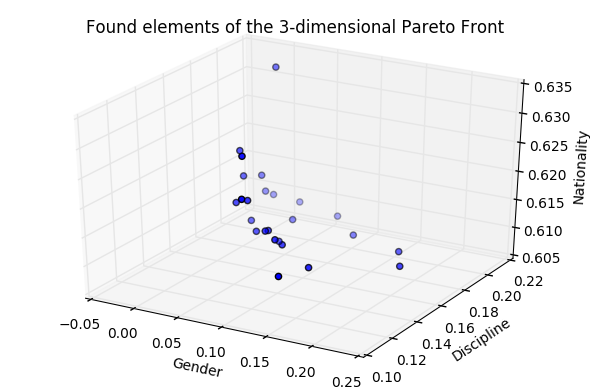

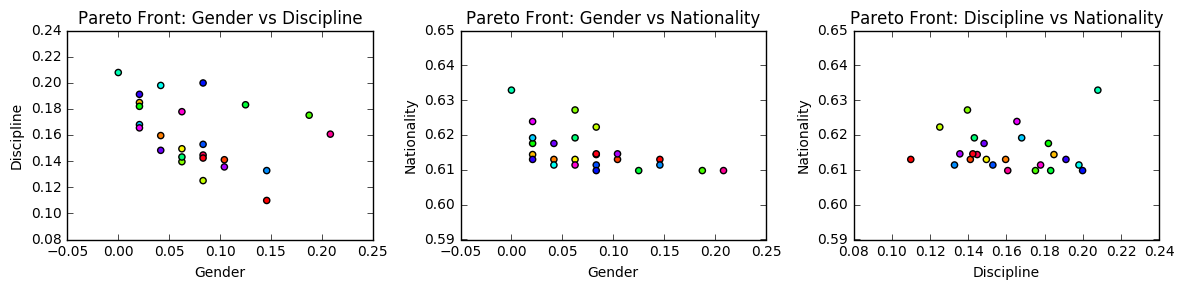

In [89]:
sem_students = students[students['Semester'] == 'WT-15']
P = algo.semo(sem_students, 'WT-15', debug=True, epochs=10000, mutation_intensity=30, precision=4)
print('\nFound {} elements of the Pareto Front'.format(len(P)))
utils.plot_pareto_front_3d(P, filename='output/pareto-3d-10000-30-4.pdf')
utils.plot_pareto_front_2d(P, filename='output/pareto-2d-10000-30-4.pdf')

#### Applying SEMO

In [90]:
teaming2 = utils.process_semesters(students, algo.semo, epochs=6000, mutation_intensity=20, precision=4)
utils.store_teaming(teaming2, "output/teaming2.out")

+.+++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++.++++++++++++.+++++++++.++++++++.+++++++++++++++.+++++.++++.++++++.+++
Best solution out of 25 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.04, Disciplines=0.13, Nationalities=0.62, Collision=0.00
+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++.++++++++++.+++++++.++++.++++.+++.+.+.+
Best solution out of 16 elements:
Multi-objective metric for semester ST-16: GenderBalance=0.02, Disciplines=0.19, Nationalities=0.61, Collision=0.00
+.++++++++++++++++++++++++++++.++++++++++.+++++++.+++.+++++++.+++++++.+++.++++.++++.+
Best solution out of 21 elements:
Multi-objective metric for semester WT-16: GenderBalance=0.04, Disciplines=0.14, Nationalities=0.54, Collision=0.00
+.++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++.++++++++++++.+++++++.+.+++++++.+++++.++.++++.++
Best solution out of 15 elements:
Multi-objective metric for semester ST-17: GenderBalance=0.05, 

In [91]:
teaming2_metric = metrics.overall_multi_objective(teaming2)
metrics.print_metric(teaming2_metric, 'teaming 2')

Multi-objective metric for teaming 2: GenderBalance=0.04, Disciplines=0.15, Nationalities=0.62, Collision=0.00


## Teaming 3 (Inter-team diversity)

In [92]:
teaming3 = utils.process_semesters(students, algo.semo, epochs=6000,
                                   previous_teaming=teaming2, mutation_intensity=20,
                                   precision=4)
utils.store_teaming(teaming3, "output/teaming3.out")

.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++++.+++++++++++++++++++++++++.++++++++++++++.++++++++.+++++++++++++++.++++++++++++.++++++++.+++++++++.++++++
Best solution out of 49 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.06, Disciplines=0.15, Nationalities=0.61, Collision=0.03
+.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++++++.+++++++++++++.++++++++++.+++++++++++.+++++++++++++++++.++++++++++++.+++++++++++++++++++.++++++++++++++
Best solution out of 67 elements:
Multi-objective metric for semester ST-16: GenderBalance=0.04, Disciplines=0.17, Nationalities=0.62, Collision=0.03
+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++.+++

In [93]:
teaming3_metric = metrics.overall_multi_objective(teaming3, previous_teaming=teaming2)
metrics.print_metric(teaming3_metric, 'teaming 3')

Multi-objective metric for teaming 3: GenderBalance=0.06, Disciplines=0.15, Nationalities=0.62, Collision=0.03


## Teaming 4 (Double inter-team diversity)

In [94]:
teaming4 = utils.process_semesters(students, algo.semo, epochs=6000,
                                   previous_teaming=(teaming2, teaming3), mutation_intensity=20,
                                   precision=4)
utils.store_teaming(teaming4, "output/teaming4.out")

+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++.+++++++++++++++++++++++.+++++++++++.+++++++++++.+++++++++.++++++++.++++++.+++++
Best solution out of 85 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.06, Disciplines=0.16, Nationalities=0.61, Collision=0.04
+.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++.++++++++++++++++++++++++.++++++++++++++++++++++.++++++++++++++++.+++++++++++++.+++++++++.++++++++++.+++++++++++++
Best solution out of 81 elements:
Multi-objective metric for semester ST-16: GenderBalance=0.04, Disciplines=0.17, Nationalities=0.62, Collision=0.05
+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++

In [95]:
teaming4_metric = metrics.overall_multi_objective(teaming4, previous_teaming=(teaming2, teaming3))
metrics.print_metric(teaming4_metric, 'teaming 4')

Multi-objective metric for teaming 4: GenderBalance=0.05, Disciplines=0.16, Nationalities=0.62, Collision=0.05


## Comparison

,teaming1,teaming2,teaming3,teaming4
Gender,0.288194,0.038194,0.057292,0.053819
Discipline,0.381832,0.149366,0.155767,0.157210
Nationality,0.631175,0.619535,0.618698,0.619067
Collision,NaN,NaN,0.029687,0.047396


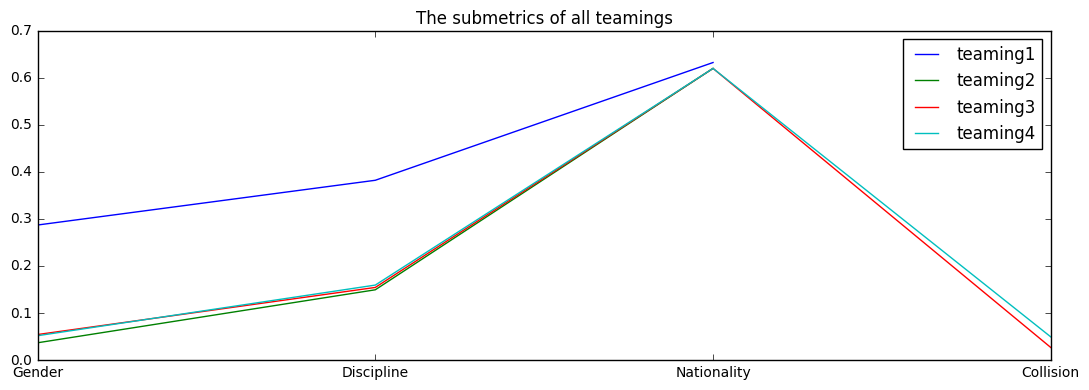

In [119]:
utils.plot_comparison([teaming1_metric, teaming2_metric, teaming3_metric, teaming4_metric], filename='output/comparison.pdf')
comparison = utils.comparison_table(teaming1, teaming2, teaming3, teaming4, METRICS, SEMESTER)
comparison.mean(axis=2)  # Average over semester

# Paper notes

#### Problem definition

Regarding the problem definition and selection of a fitting algorithm:

It might be that for one team of a semester the number of disciplines is in conflict with the number of nationalities. Therefore we assume that this multi-objective problem is a nontrivial one. An algorithm for this problem has to look for a nondominated (Pareto optimal) solution.

Definition of all submetrics: [see scanned papers]

We've chosen the Simple Evolutionary Multi-objective Optimization (SEMO) algorithm proposed by [Laumanns et al.][0]

#### Evaluation

The results of the algorithm between teaming2 and teaming3 get worse because we consider the fourth metric in the second one. With an additional submetric the problem become's more difficult and the search space greater. Therefore the algorithm takes longer to find a good local minimum regarding all four submetrics.
For the fourth teaming the search space doesn't become greater but there are less good solution because of the aggravated metric


#### Results

[Argue why is it so hard to find a good solution regarding nationalities / disciplines (because of unbalanced data) -> see below table regarding the counts of each category]

[0]: http://repository.ias.ac.in/83516/1/20-a.pdf

#### Count collisions

In [44]:
def metric_collision(team, previous_teaming=None):
    if previous_teaming is None:
        return 0
    k = len(team)
    if isinstance(previous_teaming, tuple):
        previous_teaming1, previous_teaming2 = previous_teaming
        collisions = sum((previous_teaming1['Team'][s1] == previous_teaming1['Team'][s2]) + \
                         (previous_teaming2['Team'][s1] == previous_teaming2['Team'][s2])
                         for s1, s2 in it.combinations(team.index, 2))
        return collisions
    collisions = sum(previous_teaming['Team'][s1] == previous_teaming['Team'][s2]
                     for s1, s2 in it.combinations(team.index, 2))
    return collisions

def sem_multi_objective(teaming, previous_teaming=None):
    results = 0
    for i in range(16):
        team = teaming[teaming['Team'] == i+1]
        results += metric_collision(team, previous_teaming)
    # Take the average for each objective
    return results

def overall_multi_objective(teaming, previous_teaming=None):
    results = 0
    for semester in ('WT-15', 'ST-16', 'WT-16', 'ST-17'):
        sem_teaming = teaming[teaming['Semester'] == semester]
        results += sem_multi_objective(sem_teaming, previous_teaming)
    return results

In [47]:
teaming1 = pd.read_csv('output/teaming1.out')
teaming2 = pd.read_csv('output/teaming2.out')
teaming3 = pd.read_csv('output/teaming3.out')
teaming4 = pd.read_csv('output/teaming4.out')
print(overall_multi_objective(teaming3, teaming2))
print(overall_multi_objective(teaming4, (teaming2, teaming3)))

19
61
